# A Simple Example of Properties of IV estimator when Instruments are Weak

Simulation Design

In [187]:
import hdmpy
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from statsmodels.sandbox.regression.gmm import IV2SLS
import numpy as np                                                              
import seaborn as sns                                                           
from scipy import stats                                                         
import matplotlib.pyplot as plt 

In [188]:
# Simulation Design

# Set seed
np.random.seed(0)
B = 1000
IVEst = np.zeros( B )
n = 100
beta = .25

mean = 0
sd = 1

U = np.random.normal( mean , sd, n ).reshape( n, 1 )
Z = np.random.normal( mean , sd, n ).reshape( n, 1 )
D = beta*Z + U 
Y = D + U

mod = sm.OLS(D, sm.add_constant(Z))    # Describe model
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     13.47
Date:                Wed, 19 May 2021   Prob (F-statistic):           0.000395
Time:                        07:45:45   Log-Likelihood:                -142.05
No. Observations:                 100   AIC:                             288.1
Df Residuals:                      98   BIC:                             293.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0509      0.101      0.501      0.6

In [189]:
IV = IV2SLS(Y, D, sm.add_constant(Z))
IV_res = IV.fit()
print(IV_res.summary())

                          IV2SLS Regression Results                           
Dep. Variable:                      y   R-squared:                       0.892
Model:                         IV2SLS   Adj. R-squared:                  0.891
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Wed, 19 May 2021                                         
Time:                        07:45:45                                         
No. Observations:                 100                                         
Df Residuals:                      99                                         
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3230      0.180      7.365      0.0

In [190]:
IV_res.summary2().tables[1]["Coef."][0]

1.3230345755631345

Note that the instrument is weak here (contolled by $\beta$) -- the t-stat is less than 4.

## Run 1000 trials to evaluate distribution of the IV estimator

In [191]:
# Simulation design 

# Set seed
np.random.seed(0)
B = 1000 # Trials
IVEst = np.zeros( B )

for i in range( 0, B ):
    U = np.random.normal( mean , sd, n ).reshape( n, 1 )
    Z = np.random.normal( mean , sd, n ).reshape( n, 1 )
    D = beta*Z + U 
    Y = D + U
    
    IV = IV2SLS(Y, D, sm.add_constant(Z))
    IV_res = IV.fit()
    
    IVEst[ i ] = IV_res.summary2().tables[1]["Coef."][0]

In [192]:
IVEst

array([ 1.32303458e+00,  1.35920545e+00,  1.27528177e+00,  1.31795707e+00,
        8.92612860e-01,  1.15075743e+00,  1.39541223e+00,  1.24046187e+00,
        1.03656449e+00,  7.49148368e-01,  1.66467612e-01,  5.42772305e-01,
       -2.49194696e+00,  2.28867549e-01,  8.84861973e-02,  1.33344096e+00,
        1.27515523e+00,  2.73053783e-01,  1.13439410e+00,  9.08455140e-01,
        1.33805748e+00,  1.15216886e+00,  1.22138349e+00,  1.11055465e+00,
        7.70050438e-01,  1.46744095e+00,  5.09039625e-01,  9.89986241e-01,
        1.33663526e+00,  9.24970759e-01,  1.18487116e+00,  9.37873503e-01,
        1.13082697e+00,  4.69246357e-01,  1.10240992e+00,  1.29446004e+00,
        4.58298687e-01,  1.18565568e+00,  7.44442492e-01,  1.17511530e+00,
        1.27094553e+00,  1.24699451e+00,  1.61650625e+00,  8.75531382e-01,
        2.43879171e-01,  1.35811277e+00,  1.30501832e+00,  9.55013337e-01,
        1.01032459e+00,  1.07437955e+00,  1.22472863e+00,  8.60868688e-01,
        1.21146144e+00,  

## Plot the Actual Distribution against the Normal Approximation (based on Strong Instrument Assumption)

(-5.0, 5.0)

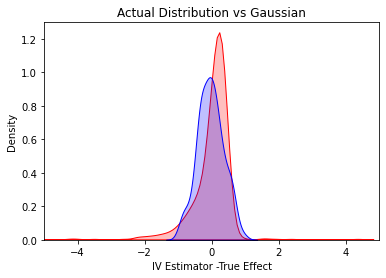

In [197]:
val = np.arange(-5,5.5,0.05)
var = (1/beta**2)*(1/100)   # theoretical variance of IV
sd = np.sqrt(var)

normal_dist = np.random.normal(0,sd,val.shape[0])

# plotting both distibutions on the same figure
fig = sns.kdeplot(IVEst-1, shade=True, color="r")
fig = sns.kdeplot(normal_dist, shade=True, color="b")

plt.title("Actual Distribution vs Gaussian")
plt.xlabel('IV Estimator -True Effect')
plt.xlim(-5,5)

In [198]:
rejection_frequency = np.sum(( np.abs(IVEst-1)/sd > 1.96))/B
print("Rejection Frequency is {} ,while we expect it to be .05".format(rejection_frequency))

Rejection Frequency is 0.079 ,while we expect it to be .05
